---
# -------HEART DISEASE PREDICTION USING CLASSIFICATION MODELS-------
---

![Coronary Heart Disease](headimg.jpeg)

### Dataset Information

##### Source Information:
   -- [Cleveland Clinic Foundation (cleveland.data)](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/)

    V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
---
##### Number of Instances: 
    303
---    
##### Attribute Information:
    Only 14 used out of 76
    
        1. #3  (Age)          age in years  
        
        2. #4  (Sex)          sex (1 = male; 0 = female)
        3. #9  (ChestPain)    chest pain type(1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
        
        4. #10 (RestBPS)      resting blood pressure (in mm Hg)
        
        5. #12 (Cholestrol)   serum cholestoral in mg/dl
        
        6. #16 (FBS)          fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
        
        7. #19 (RestECG)      resting ecg (0: normal, 1: having ST-T wave abnormality, 2: left ventricular hypertrophy)
        
        8. #32 (MaxHR)        maximum heart rate achieved
        
        9. #38 (Exang)        exercise induced angina (1 = yes; 0 = no)
        
        10. #40 (OldPeak)     ST depression induced by exercise relative to rest
        
        11. #41 (Slope)       slope of peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping)
        
        12. #44 (Nmajvess)    number of major vessels (0-3) colored by flourosopy
        
        13. #51 (Thal)        3 = normal; 6 = fixed defect; 7 = reversable defect
        
        14. #58 (ADS)       (the predicted attribute)
                              diagnosis of heart disease (angiographic disease status)
                              0: < 50% diameter narrowing
                              1: > 50% diameter narrowing

## Libraries to be used are imported once and all.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Dataset is read, and column names updated.

In [2]:
dataset = pd.read_csv('processedheart.csv',  header = None)
dataset.columns = ['Age', 'Sex', 'ChestPain', 'RestBPS', 'Cholestrol', 'FBS',
       'RestECG', 'MaxHR', 'Exang', 'OldPeak', 'Slope', 'Nmajvess',
       'Thal', 'ADS']
dataset.head()

,Age,Sex,ChestPain,RestBPS,Cholestrol,FBS,RestECG,MaxHR,Exang,OldPeak,Slope,Nmajvess,Thal,ADS
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
dataset.isin(['?']).sum()

Age           0
Sex           0
ChestPain     0
RestBPS       0
Cholestrol    0
FBS           0
RestECG       0
MaxHR         0
Exang         0
OldPeak       0
Slope         0
Nmajvess      4
Thal          2
ADS           0
dtype: int64

In [4]:
for i in range(len(dataset['Age'])):
    if dataset['ADS'][i] > 1:
        dataset['ADS'][i] = 1
    if dataset['Thal'][i] == '?':
        dataset['Thal'][i] = 6
    if dataset['Nmajvess'][i] == '?':
        dataset['Nmajvess'][i] = 3
        
    dataset['Thal'][i] = int(dataset['Thal'][i])
        
dataset.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-pac

,Age,Sex,ChestPain,RestBPS,Cholestrol,FBS,RestECG,MaxHR,Exang,OldPeak,Slope,Nmajvess,Thal,ADS
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


In [5]:
dataset.isin(['?']).sum()

Age           0
Sex           0
ChestPain     0
RestBPS       0
Cholestrol    0
FBS           0
RestECG       0
MaxHR         0
Exang         0
OldPeak       0
Slope         0
Nmajvess      0
Thal          0
ADS           0
dtype: int64

In [6]:
encoder = LabelEncoder()
dataset['ChestPain'] =  encoder.fit_transform(dataset['ChestPain'])
dataset['Slope'] =  encoder.fit_transform(dataset['Slope'])
dataset['Thal'] =  encoder.fit_transform(dataset['Thal'])
dataset

,Age,Sex,ChestPain,RestBPS,Cholestrol,FBS,RestECG,MaxHR,Exang,OldPeak,Slope,Nmajvess,Thal,ADS
0,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,0,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,2,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,0,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,0,0
5,56,1,1,120,236,0,0,178,0,0.8,0,0,0,0
6,62,0,3,140,268,0,2,160,0,3.6,2,2,0,1
7,57,0,3,120,354,0,0,163,1,0.6,0,0,0,0
8,63,1,3,130,254,0,2,147,0,1.4,1,1,2,1
9,53,1,3,140,203,1,2,155,1,3.1,2,0,2,1


# Data Exploration using Graphs/Plots

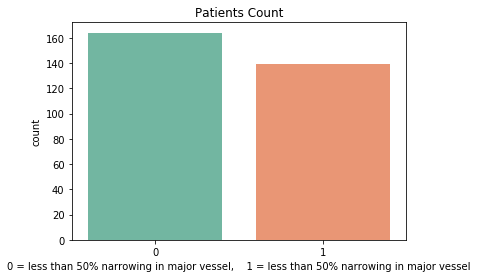

0    164
1    139
Name: ADS, dtype: int64


In [7]:
sns.countplot(x="ADS", data= dataset, palette= "Set2")
plt.xlabel("0 = less than 50% narrowing in major vessel,    1 = less than 50% narrowing in major vessel")
plt.title('Patients Count')
plt.show()

print(dataset.ADS.value_counts(sort= False))

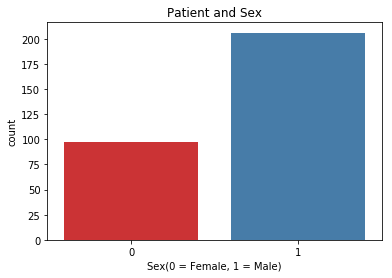

0     97
1    206
Name: Sex, dtype: int64


In [8]:
sns.countplot(x= 'Sex', data= dataset, palette= 'Set1')
plt.xlabel('Sex(0 = Female, 1 = Male)')
plt.title('Patient and Sex')
plt.show()

print(dataset.Sex.value_counts(sort = False))

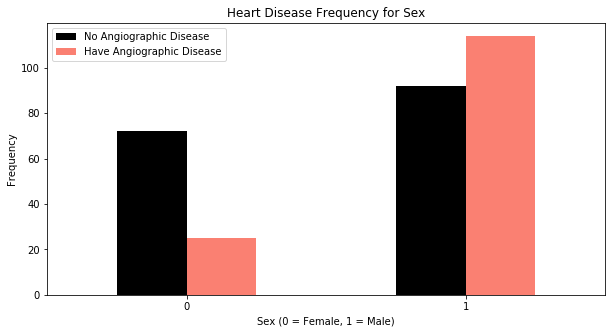

In [9]:
pd.crosstab(dataset.Sex,dataset.ADS).plot(kind="bar",figsize=(10,5),color=['black','Salmon' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Angiographic Disease", "Have Angiographic Disease"])
plt.ylabel('Frequency')
plt.show()

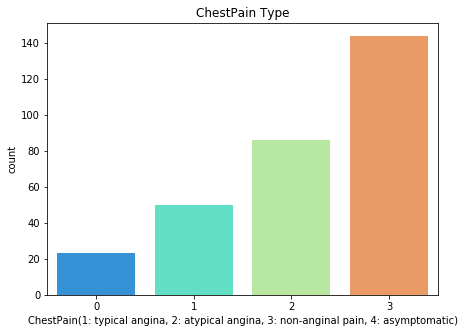

0     23
1     50
2     86
3    144
Name: ChestPain, dtype: int64


In [10]:
plt.figure(figsize=(7, 5))
sns.countplot(x="ChestPain", data= dataset, palette= "rainbow")
plt.xlabel("ChestPain(1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)")
plt.title('ChestPain Type')
plt.show()

print(dataset.ChestPain.value_counts(sort= False))

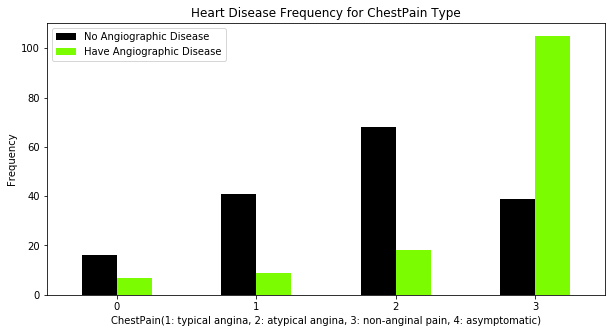

In [11]:
pd.crosstab(dataset.ChestPain,dataset.ADS).plot(kind="bar",figsize=(10,5),color=['black','lawngreen' ])
plt.title('Heart Disease Frequency for ChestPain Type')
plt.xlabel("ChestPain(1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)")
plt.xticks(rotation=0)
plt.legend(["No Angiographic Disease", "Have Angiographic Disease"])
plt.ylabel('Frequency')
plt.show()

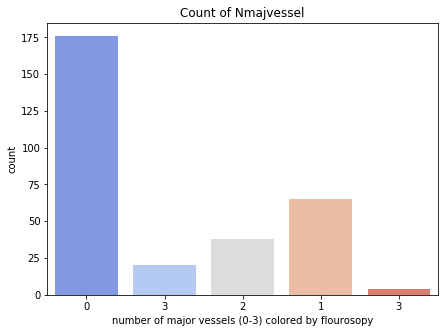

2     38
3      4
1     65
3     20
0    176
Name: Nmajvess, dtype: int64


In [12]:
plt.figure(figsize=(7, 5))
sns.countplot(x="Nmajvess", data= dataset, palette= "coolwarm")
plt.xlabel("number of major vessels (0-3) colored by flourosopy")
plt.title('Count of Nmajvessel')
plt.show()

print(dataset.Nmajvess.value_counts(sort= False))

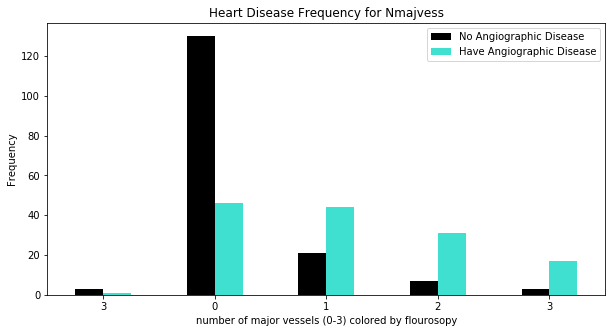

In [13]:
pd.crosstab(dataset.Nmajvess,dataset.ADS).plot(kind="bar",figsize=(10,5),color=['black','turquoise'])
plt.title('Heart Disease Frequency for Nmajvess')
plt.xlabel("number of major vessels (0-3) colored by flourosopy")
plt.xticks(rotation=0)
plt.legend(["No Angiographic Disease", "Have Angiographic Disease"])
plt.ylabel('Frequency')
plt.show()

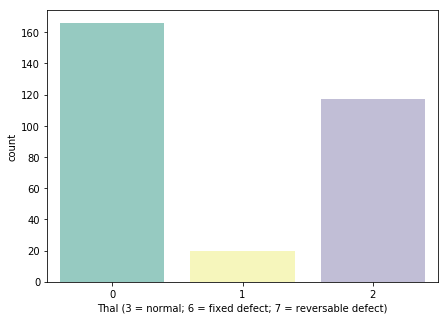

0    166
1     20
2    117
Name: Thal, dtype: int64


In [14]:
plt.figure(figsize=(7, 5))
sns.countplot(x="Thal", data= dataset, palette= "Set3")
plt.xlabel("Thal (3 = normal; 6 = fixed defect; 7 = reversable defect)")
plt.show()

print(dataset.Thal.value_counts(sort= False))

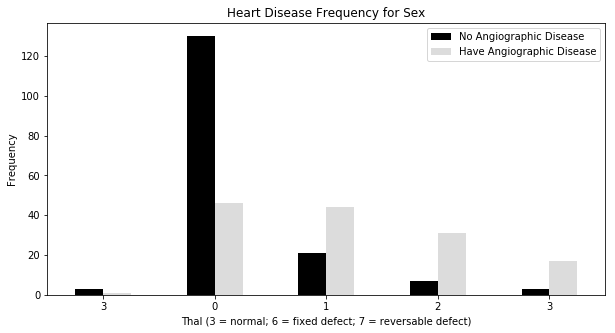

In [15]:
pd.crosstab(dataset.Nmajvess,dataset.ADS).plot(kind="bar",figsize=(10,5),color=['black','gainsboro'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel("Thal (3 = normal; 6 = fixed defect; 7 = reversable defect)")
plt.xticks(rotation=0)
plt.legend(["No Angiographic Disease", "Have Angiographic Disease"])
plt.ylabel('Frequency')
plt.show()

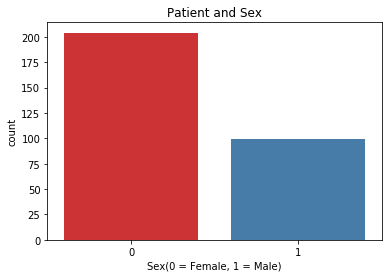

0     97
1    206
Name: Sex, dtype: int64


In [16]:
sns.countplot(x= 'Exang', data= dataset, palette= 'Set1')
plt.xlabel('Sex(0 = Female, 1 = Male)')
plt.title('Patient and Sex')
plt.show()

print(dataset.Sex.value_counts(sort = False))

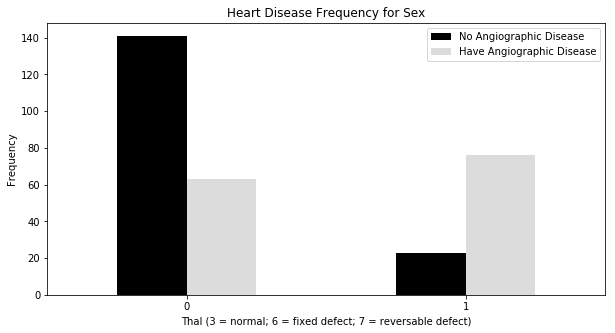

In [17]:
pd.crosstab(dataset.Exang,dataset.ADS).plot(kind="bar",figsize=(10,5),color=['black','gainsboro'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel("Thal (3 = normal; 6 = fixed defect; 7 = reversable defect)")
plt.xticks(rotation=0)
plt.legend(["No Angiographic Disease", "Have Angiographic Disease"])
plt.ylabel('Frequency')
plt.show()

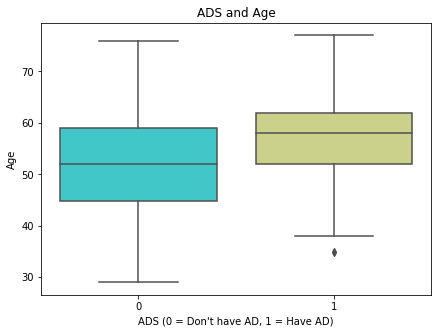

In [18]:
plt.figure(figsize=(7, 5))
sns.boxplot(x= 'ADS', y= 'Age', data= dataset, palette= 'rainbow')
plt.xlabel("ADS (0 = Don't have AD, 1 = Have AD)")
plt.title('ADS and Age')
plt.show()

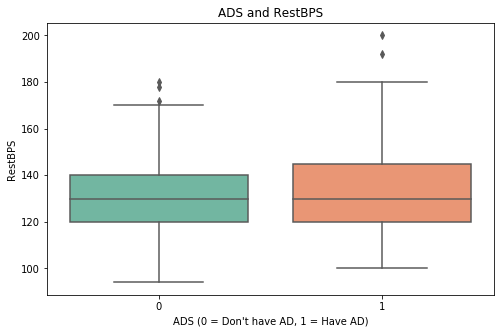

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x= 'ADS', y= 'RestBPS', data= dataset, palette= 'Set2')
plt.xlabel("ADS (0 = Don't have AD, 1 = Have AD)")
plt.title('ADS and RestBPS')
plt.show()

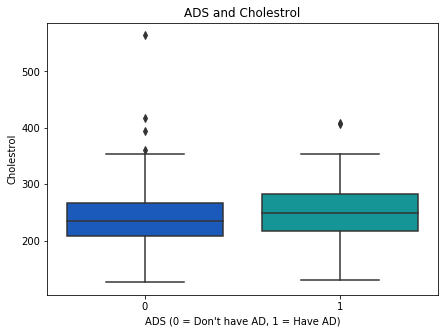

In [20]:
plt.figure(figsize=(7, 5))
sns.boxplot(x= 'ADS', y= 'Cholestrol', data= dataset, palette= 'winter')
plt.xlabel("ADS (0 = Don't have AD, 1 = Have AD)")
plt.title('ADS and Cholestrol')
plt.show()

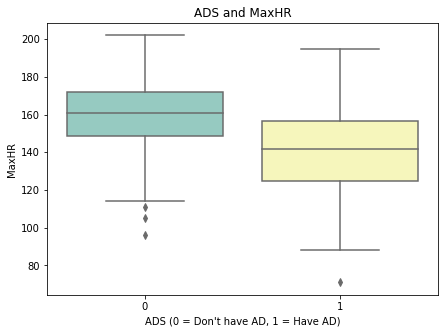

In [21]:
plt.figure(figsize=(7, 5))
sns.boxplot(x= 'ADS', y= 'MaxHR', data= dataset, palette= 'Set3')
plt.xlabel("ADS (0 = Don't have AD, 1 = Have AD)")
plt.title('ADS and MaxHR')
plt.show()

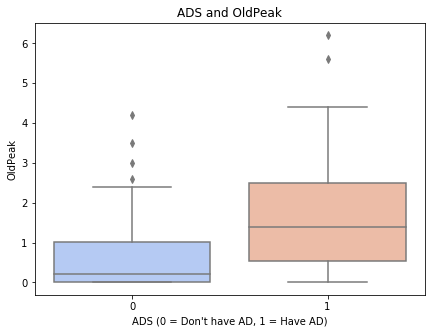

In [22]:
plt.figure(figsize=(7, 5))
sns.boxplot(x= 'ADS', y= 'OldPeak', data= dataset, palette= 'coolwarm')
plt.xlabel("ADS (0 = Don't have AD, 1 = Have AD)")
plt.title('ADS and OldPeak')
plt.show()

# Data Preprocessing

In [23]:
dataset.head()

,Age,Sex,ChestPain,RestBPS,Cholestrol,FBS,RestECG,MaxHR,Exang,OldPeak,Slope,Nmajvess,Thal,ADS
0,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,0,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,2,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,0,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,0,0


In [24]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1:].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42)

In [26]:
sc_X = StandardScaler()
X_train[:, [0,3,4,7,9]] = sc_X.fit_transform(X_train[:, [0,3,4,7,9]])
X_test[:, [0,3,4,7,9]] = sc_X.transform(X_test[:, [0,3,4,7,9]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Logistic Regression

In [27]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
logistic_pred = logistic.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
logistic_cm = confusion_matrix(y_test, logistic_pred)
print(classification_report(y_test, logistic_pred))
logistic_cm

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        39
           1       0.86      0.84      0.85        37

   micro avg       0.86      0.86      0.86        76
   macro avg       0.86      0.85      0.86        76
weighted avg       0.86      0.86      0.86        76



array([[34,  5],
       [ 6, 31]], dtype=int64)

In [29]:
logistic_pred_train = logistic.predict(X_train)
logistic_cm_train = confusion_matrix(y_train, logistic_pred_train)
print(classification_report(y_train, logistic_pred_train))
logistic_cm_train

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       125
           1       0.85      0.77      0.81       102

   micro avg       0.84      0.84      0.84       227
   macro avg       0.84      0.83      0.83       227
weighted avg       0.84      0.84      0.84       227



array([[111,  14],
       [ 23,  79]], dtype=int64)

# K-Nearest Neighbors (KNN) Classification

In [30]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [31]:
print(classification_report(y_test, knn_pred))
knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        39
           1       0.87      0.89      0.88        37

   micro avg       0.88      0.88      0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



array([[34,  5],
       [ 4, 33]], dtype=int64)

In [32]:
knn_pred_train = knn.predict(X_train)
knn_cm_train = confusion_matrix(y_train, knn_pred_train)
print(classification_report(y_train, knn_pred_train))
knn_cm_train

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       125
           1       0.87      0.83      0.85       102

   micro avg       0.87      0.87      0.87       227
   macro avg       0.87      0.86      0.87       227
weighted avg       0.87      0.87      0.87       227



array([[112,  13],
       [ 17,  85]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

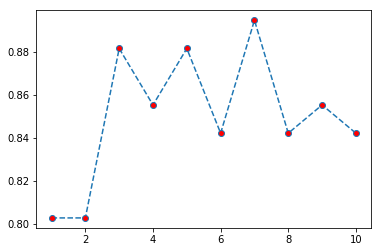

In [33]:
error = []
for i in range(1,11):
    knn_check = KNeighborsClassifier(n_neighbors= i)
    knn_check.fit(X_train, y_train)
    knn_pred_check = knn_check.predict(X_test)
    error.append(knn_check.score(X_test, y_test))
plt.plot(range(1,11), error, linestyle='dashed', marker='o', markerfacecolor='red')
    

# Support Vector Classifier

In [34]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [35]:
print(classification_report(y_test, svm_pred))
svm_cm = confusion_matrix(y_test, svm_pred)
svm_cm

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        39
           1       0.89      0.86      0.88        37

   micro avg       0.88      0.88      0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



array([[35,  4],
       [ 5, 32]], dtype=int64)

In [36]:
svm_pred_train = svm.predict(X_train)
svm_cm_train = confusion_matrix(y_train, svm_pred_train)
print(classification_report(y_train, svm_pred_train))
svm_cm_train

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       125
           1       0.92      0.80      0.86       102

   micro avg       0.88      0.88      0.88       227
   macro avg       0.89      0.87      0.88       227
weighted avg       0.88      0.88      0.88       227



array([[118,   7],
       [ 20,  82]], dtype=int64)

# Naive-Bayes Classifier

In [37]:
naiveb = GaussianNB()
naiveb.fit(X_train, y_train)
naiveb_pred = naiveb.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
print(classification_report(y_test, naiveb_pred))
naiveb_cm = confusion_matrix(y_test, naiveb_pred)
naiveb_cm

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        39
           1       0.88      0.78      0.83        37

   micro avg       0.84      0.84      0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.85      0.84      0.84        76



array([[35,  4],
       [ 8, 29]], dtype=int64)

In [39]:
naiveb.score(X_test, y_test)

0.8421052631578947

In [40]:
naiveb_pred_train = naiveb.predict(X_train)
print(classification_report(y_train, naiveb_pred_train))
naiveb_cm_train = confusion_matrix(y_train, naiveb_pred_train)
naiveb_cm_train

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       125
           1       0.85      0.80      0.83       102

   micro avg       0.85      0.85      0.85       227
   macro avg       0.85      0.85      0.85       227
weighted avg       0.85      0.85      0.85       227



array([[111,  14],
       [ 20,  82]], dtype=int64)

# Decision Tree Classifier

In [41]:
dtree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_split= 100)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

In [42]:
print(classification_report(y_test, dtree_pred))
dtree_cm = confusion_matrix(y_test, dtree_pred)
dtree_cm

              precision    recall  f1-score   support

           0       0.69      0.97      0.81        39
           1       0.95      0.54      0.69        37

   micro avg       0.76      0.76      0.76        76
   macro avg       0.82      0.76      0.75        76
weighted avg       0.82      0.76      0.75        76



array([[38,  1],
       [17, 20]], dtype=int64)

In [43]:
dtree_pred_train = dtree.predict(X_train)
print(classification_report(y_train, dtree_pred_train))
dtree_cm_train = confusion_matrix(y_train, dtree_pred_train)
dtree_cm_train

              precision    recall  f1-score   support

           0       0.71      0.97      0.82       125
           1       0.93      0.52      0.67       102

   micro avg       0.77      0.77      0.77       227
   macro avg       0.82      0.74      0.74       227
weighted avg       0.81      0.77      0.75       227



array([[121,   4],
       [ 49,  53]], dtype=int64)

# Random Forest Classifier

In [44]:
forest = RandomForestClassifier(criterion= 'entropy', n_estimators= 800, max_depth= 5, min_samples_split= 110, random_state=101)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [45]:
print(classification_report(y_test, forest_pred))
forest_cm = confusion_matrix(y_test, forest_pred)
forest_cm

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        39
           1       0.91      0.84      0.87        37

   micro avg       0.88      0.88      0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



array([[36,  3],
       [ 6, 31]], dtype=int64)

In [46]:
forest_pred_train = forest.predict(X_train)
print(classification_report(y_train, forest_pred_train))
forest_cm_train = confusion_matrix(y_train, forest_pred_train)
forest_cm_train

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       125
           1       0.89      0.71      0.79       102

   micro avg       0.83      0.83      0.83       227
   macro avg       0.84      0.82      0.82       227
weighted avg       0.84      0.83      0.82       227



array([[116,   9],
       [ 30,  72]], dtype=int64)

In [47]:
print("Logistic Regression Test Accuracy {:.2f}%".format(logistic.score(X_test, y_test)*100))
print("KNN Test Accuracy {:.2f}%".format(knn.score(X_test, y_test)*100))
print("SVM Test Accuracy {:.2f}%".format(svm.score(X_test, y_test)*100))
print("Naive Bayes Logistic Regression Test Accuracy {:.2f}%".format(naiveb.score(X_test, y_test)*100))
print("Decison Tree Test Accuracy {:.2f}%".format(dtree.score(X_test, y_test)*100))
print("Random Forest Test Accuracy {:.2f}%".format(forest.score(X_test, y_test)*100))


Logistic Regression Test Accuracy 85.53%
KNN Test Accuracy 88.16%
SVM Test Accuracy 88.16%
Naive Bayes Logistic Regression Test Accuracy 84.21%
Decison Tree Test Accuracy 76.32%
Random Forest Test Accuracy 88.16%
